In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Linear and Logistic Regression

- Regression is a technique for supervised learning that is based on strong statistical assumptions about the underlying data. Linear and logistic regression are just two different assumptions on the data
- Regression can be used when the assumptions are not met, but then it needs to be graded based on _performance on the test data_. P-values, F-scores, etc.. depend on the assumptions being true.

## Linear Regression

Let $y \in \mathbb{R}$ be a random variable (the target) and $X = x_1, \ldots, x_p$ be a set of _independent_ variables (the predictors). Then
$$
y \sim \cal{N}(\mu, \sigma)
$$
where 
$$
\mu = \mu(X) = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_p x_p
$$

### Linear Regression Test Data

Let's generate some sample data that matches the assumptions exactly.

1. Set p = 3
2. Choose a formula for $\mu(X)$
$$
\mu(X) = 5 - 9 x_1 + 3 x_2 + 2 x_3
$$

Generate a 100x3 data frame of random numbers

In [5]:
X = pd.DataFrame(np.random.rand(100, 3))

In [6]:
X.head()

,0,1,2
0,0.471694,0.896323,0.904967
1,0.951542,0.711560,0.172171
2,0.879824,0.156652,0.461780
3,0.912407,0.834726,0.797250
4,0.446894,0.975716,0.318033


The target (response) is a linear function of the features, plus some gaussian noise.

In [15]:
sigma = 1
def make_target(row, sigma):
    x1, x2, x3 = row[0], row[1], row[2]
    mu = 5 - 9*x1 + 3*x2 + 2*x3
    y = np.random.normal(mu, sigma)
    return y
y = X.apply(lambda row: make_target(row, sigma), axis=1)

In [16]:
y.head()

0    7.031868
1    0.784273
2   -1.041651
3    1.197193
4    4.297637
dtype: float64

In [17]:
y.shape

(100,)

### Recover the formula using linear regression

In [18]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X, y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Intercept

In [19]:
linreg.intercept_

4.8225212023256985

Coefficients

In [20]:
linreg.coef_

array([-8.94940546,  3.6493603 ,  1.85845102])

Plot predicted vs actual

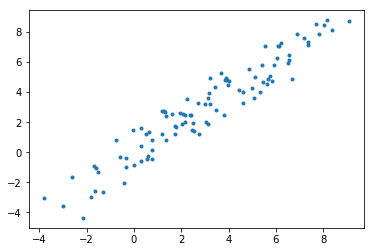

In [21]:
pred = linreg.predict(X)
plt.plot(pred, y, '.')

R-squared

In [22]:
linreg.score(X, y)

0.9118419886289979

## Logistic Regression

Let $y \in \{0, 1\}$ be a random variable (the target) and $X = x_1, \ldots, x_n$ be a set of _independent_ variables (the predictors). Then
$$
y \sim \cal{Ber}(p)
$$
where
$$
p = p(X) = f(w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_n x_n)
$$
and $f$ is the _logistic function_
$$
f(t) = \frac{1}{1 + e^{-t}}
$$

### Why Sigmoid?

We choose the sigmoid function because it is a transformation of the whole real line to the interval (0, 1). That is, it turns real numbers into probabilities

In [147]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

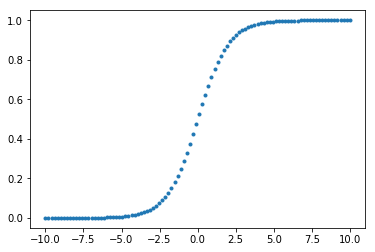

In [42]:
pts = np.linspace(-10, 10, 100)
sig = sigmoid(pts)
plt.plot(pts, sig, '.')

### Logistic Regression Test Data

Let's generate some sample data that matches the assumptions exactly.

1. Set n = 3
2. Choose a formula for $p(X)$
$$
p(X) = f(5 - 9 x_1 + 3 x_2 + 2 x_3)
$$

#### Exercise: Generate logistic regression data according to the model above.

1. Use the same feature data (X) as before.
2. Delete the target column (use `del X['target']`)
3. Make a new target column with values in {0, 1} that is distributed Bernoulli, conditioned on the feature matrix

In [ ]:
X = ...

def make_target():

#### Recover coefficients

In [148]:
from sklearn.linear_model import LogisticRegression

# Fit logistic model

#### Plot predicted vs actual

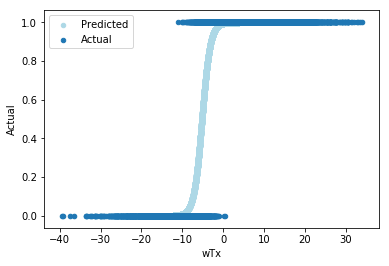

In [106]:
results = pd.DataFrame({
        'wTx': X.apply(lambda row: np.dot(row, logit.coef_.flatten()), axis=1),
        'Predicted Probability': logit.predict_proba(X)[:,1],
        'Actual': X['target']
    })

ax = results.plot(x='wTx', y='Predicted Probability', kind='scatter', 
                  label = 'Predicted', color='lightblue')
results.plot(x='wTx', y='Actual', kind='scatter', ax=ax, label='Actual')

# Regularization

Regularization is a means for preventing _overfitting_.

For any type of regression, one learns the model parameters by:

1. Assume the probabilistic model is correct.
2. Compute the _likelihood_ of each data point for a given set of parameters $w_0, \ldots, w_p$. (just evaluate the PDF at that point and target value)
3. Choose the set of parameters that maximizes the total likelihood. (or, equivalently, minimizes the log-likelihood)

For linear regression, it turns out that ${\cal l} (X) \sim ||w^T x - y||^2$. So maximizing the likelihood is the same as minimizing the mean-squared error.

For logistic regression,
$$
{\cal l} (x) := -y \log(f(w^T x)) - (1 - y) \log(1 - f(w^Tx))
$$

In either case, regularization just means that instead of directly minimizing ${\cal L}(X)$, we also add a penalty on the size of coefficients.

#### L1 (Lasso) Regularization

Find $w$ that minimizes 
$$
{\cal l}(X) + \lambda \sum_{i=1}^p |w_i|
$$

#### L2 (Ridge) Regularization

Find $w$ that minimizes 
$$
{\cal l}(X) + \lambda \sum_{i=1}^p ||w_i||^2
$$

#### Elastic Net Regularization

Find $w$ that minimizes 
$$
{\cal l}(X) + (1 - \alpha) \cdot \lambda \sum_{i=1}^p |w_i|^2 + \alpha \cdot \lambda \sum_{i=1}^p ||w_i||
$$

# Application: Crime Data

Terminal

conda update scikit-learn

In [109]:
from sklearn.model_selection import train_test_split

# Load some crime data
headers = pd.read_csv('comm_names.txt', squeeze=True)
headers = headers.apply(lambda s: s.split()[1])
crime = (pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data', 
                    header=None, na_values=['?'], names=headers)
         .iloc[:, 5:]
         .dropna()
         )

# Set target and predictors
target = 'ViolentCrimesPerPop'
predictors = [c for c in crime.columns if not c == target]

# Train/test split
train_df, test_df = train_test_split(crime, random_state=2)

## Exercise: 

1. Fit a linear regression model on train_df. The goal is to predict 'ViolentCrimesPerPop' from the other columns. What is the r-squared on the train data? What about the test data?
2. Also fit each of a ridge, lasso, and elastic net regression on the same data. Use the functions RidgeCV, LassoCV, and ElasticNetCV to cross-validate and find the best values of $\lambda$ and $\alpha$. Do this using only _the training set_
3. Which model performs the best? Answer this question using _the test set_.

### Linear Regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

R-squared on training data

R-squared on test data

### Ridge

In [149]:
from sklearn.linear_model import RidgeCV

### Lasso

In [131]:
from sklearn.linear_model import LassoCV

### Elastic Net

In [139]:
from sklearn.linear_model import ElasticNetCV

## Exercise:

1. Make the following scatterplot
    - Each point corresponds to one predictor in the data
    - The x-value is the coefficient of that predictor under OLS regression
    - The y-value is the coefficient of that predictor using ridge regularization
2. Do the same for OLS vs Lasso, and OLS vs ElasticNet

## Question: 

What is the story with the two 'large coefficients' found by OLS that are squashed by regularization? (You may have to do some digging)

## Question:

Can we tell from this process which predictors are _the most important_ for predicting violent crimes?